Instruction

How to download kaggle .jason?
* go to kaggle account page
* scroll until u found API section
then click on create new api token
a file will automatically be downloaded
* download the kaggle.json
-make a new folder in google drive named Machine Learning Assignment
-upload kaggle.json into google drive
-

##Pre_Processing##

In [ ]:
!pip install Keras-Preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import pandas as pd
import random
import cv2
import os
from tensorflow import keras
from keras.layers import *
from sklearn.metrics import confusion_matrix, classification_report
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
#link to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#direct to the file containing kaggle json file so we can download the data file
!cp '/content/drive/MyDrive/Machine Learning Assignment/kaggle.json' '/content'

In [ ]:

import zipfile
import os

os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [ ]:
#download kaggle dataset
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset

face-mask-12k-images-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#unzip the desired datset
zip_ref = zipfile.ZipFile('face-mask-12k-images-dataset.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/content') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:
#total all images for mask and no mask fro train, test, and validation
total_train_mask = len(os.listdir('/content/Face Mask Dataset/Train/WithMask'))
total_train_nomask = len(os.listdir('/content/Face Mask Dataset/Train/WithoutMask'))
total_test_mask = len(os.listdir('/content/Face Mask Dataset/Test/WithMask'))
total_test_nomask = len(os.listdir('/content/Face Mask Dataset/Test/WithoutMask'))
total_val_mask = len(os.listdir('/content/Face Mask Dataset/Validation/WithMask'))
total_val_nomask = len(os.listdir('/content/Face Mask Dataset/Validation/WithoutMask'))

print("Train sets images with mask: {}".format(total_train_mask))
print('--------------------------------------------')
print("Train sets images without mask: {}".format(total_train_nomask))
print('--------------------------------------------')
print("Test sets images with mask: {}".format(total_test_mask))
print('--------------------------------------------')
print("Test sets images without mask: {}".format(total_test_nomask))
print('--------------------------------------------')
print("Val sets images with mask: {}".format(total_val_mask))
print('--------------------------------------------')
print("Val sets images without mask: {}".format(total_val_nomask))

Train sets images with mask: 5000
--------------------------------------------
Train sets images without mask: 5000
--------------------------------------------
Test sets images with mask: 483
--------------------------------------------
Test sets images without mask: 509
--------------------------------------------
Val sets images with mask: 400
--------------------------------------------
Val sets images without mask: 400


In [ ]:
#assigning data to the variable
train_dir = "/content/Face Mask Dataset/Train"
test_dir = "/content/Face Mask Dataset/Test"
validation_dir = "/content/Face Mask Dataset/Validation"

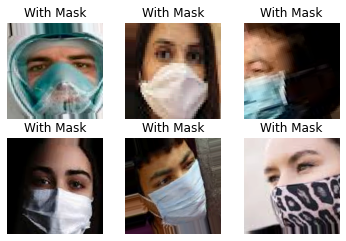

In [ ]:
#show data for with mask
from os import listdir
listdir()
mask="/content/Face Mask Dataset/Train/WithMask"
train_images_NC=listdir(mask)
plt.figure(figsize=(6,6))
for i in range(6):
    plt.subplot(3,3,i+1)
    plt.imshow(plt.imread(os.path.join(mask,train_images_NC[i])),cmap='gray')
    plt.title('With Mask')
    plt.axis('off')
plt.show()

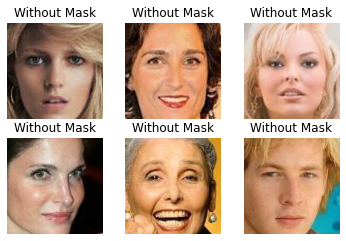

In [ ]:
#show data for no mask
nomask="/content/Face Mask Dataset/Train/WithoutMask"
train_images_NC=listdir(nomask)
plt.figure(figsize=(6,6))
for i in range(6):
    plt.subplot(3,3,i+1)
    plt.imshow(plt.imread(os.path.join(nomask,train_images_NC[i])),cmap='gray')
    plt.title('Without Mask')
    plt.axis('off')
plt.show()

In [ ]:
#image processing
# Normalise the data
train_datagen = ImageDataGenerator( horizontal_flip=True,
                                   shear_range=0.2,
                                  rescale= 1./255,
                                  zoom_range=0.2,)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "/content/Face Mask Dataset/Train"
test_dir = "/content/Face Mask Dataset/Test"
validation_dir = "/content/Face Mask Dataset/Validation"

# 1. Train Set
train_set1 = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224,224),   
        batch_size=64,    
        shuffle = False,
        seed = 42,
        class_mode = "categorical",
        classes = ['WithoutMask','WithMask'])
train_set2 = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224,224),   
        batch_size=32,    
        shuffle = False,
        seed = 42,
        class_mode = "categorical",
        classes = ['WithoutMask','WithMask'])

# 2. Test Set
test_set = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224,224),
        seed = 42,
        shuffle = False,
        batch_size=32,
        class_mode = "categorical",
        classes = ['WithoutMask','WithMask'])

# 3. Validation Set
val_set = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(224,224),
        seed = 42,
        shuffle = False,
        batch_size=32,
        class_mode = "categorical",
        classes = ['WithoutMask','WithMask'])

Found 10000 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.
Found 992 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [ ]:
train_set1.class_indices

{'WithoutMask': 0, 'WithMask': 1}

In [ ]:
train_set2.class_indices

{'WithoutMask': 0, 'WithMask': 1}

##GoogleNet/InceptionV3##

In [ ]:
#image processing
# Normalise the data
train_datagen = ImageDataGenerator( horizontal_flip=True,
                                   shear_range=0.2,
                                  rescale= 1./255,
                                  zoom_range=0.2,)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "/content/Face Mask Dataset/Train"
test_dir = "/content/Face Mask Dataset/Test"
validation_dir = "/content/Face Mask Dataset/Validation"

# 1. Train Set
train_set1 = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224,224),   
        batch_size=64,    
        shuffle = False,
        seed = 42,
        class_mode = "categorical",
        classes = ['WithoutMask','WithMask'])
train_set2 = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224,224),   
        batch_size=32,    
        shuffle = False,
        seed = 42,
        class_mode = "categorical",
        classes = ['WithoutMask','WithMask'])

# 2. Test Set
test_set1 = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224,224),
        seed = 42,
        shuffle = False,
        batch_size=64,
        class_mode = "categorical",
        classes = ['WithoutMask','WithMask'])
test_set = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224,224),
        seed = 42,
        shuffle = False,
        batch_size=32,
        class_mode = "categorical",
        classes = ['WithoutMask','WithMask'])

# 3. Validation Set
val_set1 = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224,224),
        seed = 42,
        shuffle = False,
        batch_size=64,
        class_mode = "categorical",
        classes = ['WithoutMask','WithMask'])
val_set = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(224,224),
        seed = 42,
        shuffle = False,
        batch_size=32,
        class_mode = "categorical",
        classes = ['WithoutMask','WithMask'])

Found 10000 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.
Found 992 images belonging to 2 classes.
Found 992 images belonging to 2 classes.
Found 992 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


###Model1###

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.models import Sequential

#build and compile model
inception = InceptionV3(include_top=False, 
                  weights='imagenet', 
                  input_shape=(224,224,3))    #VCG16 only accepts 224 image size

for layer in inception.layers:
    layer.trainable = False

model = Sequential()  #new keras model object
model.add(inception)  #add new layer
model.add(Flatten())  #convertsoutput to 1D vector
model.add(Dense(2,activation='softmax'))  #produce vector of length 2
model.summary()

model.compile(optimizer='adam',   #Adaptive Moment Estimation
              loss='binary_crossentropy',    #measures difference between predicted class and true class probabilities
              metrics = ['accuracy'])   #measures proportion of correctly classified images

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_5 (Flatten)         (None, 51200)             0         
                                                                 
 dense_5 (Dense)             (None, 2)                 102402    
                                                                 
Total params: 21,905,186
Trainable params: 102,402
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
train_set1.class_indices

{'WithoutMask': 0, 'WithMask': 1}

In [ ]:
#training
inception_history = model.fit(train_set1,epochs=5,validation_data=val_set)

Epoch 1/5
157/157 [==============================] - 133s 816ms/step - loss: 0.2781 - accuracy: 0.9659 - val_loss: 0.0043 - val_accuracy: 0.9987
Epoch 2/5
157/157 [==============================] - 127s 810ms/step - loss: 0.0179 - accuracy: 0.9967 - val_loss: 5.8408e-04 - val_accuracy: 1.0000
Epoch 3/5
157/157 [==============================] - 122s 777ms/step - loss: 0.0159 - accuracy: 0.9969 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 4/5
157/157 [==============================] - 126s 799ms/step - loss: 0.0100 - accuracy: 0.9976 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 5/5
157/157 [==============================] - 123s 785ms/step - loss: 0.0115 - accuracy: 0.9982 - val_loss: 0.0030 - val_accuracy: 1.0000


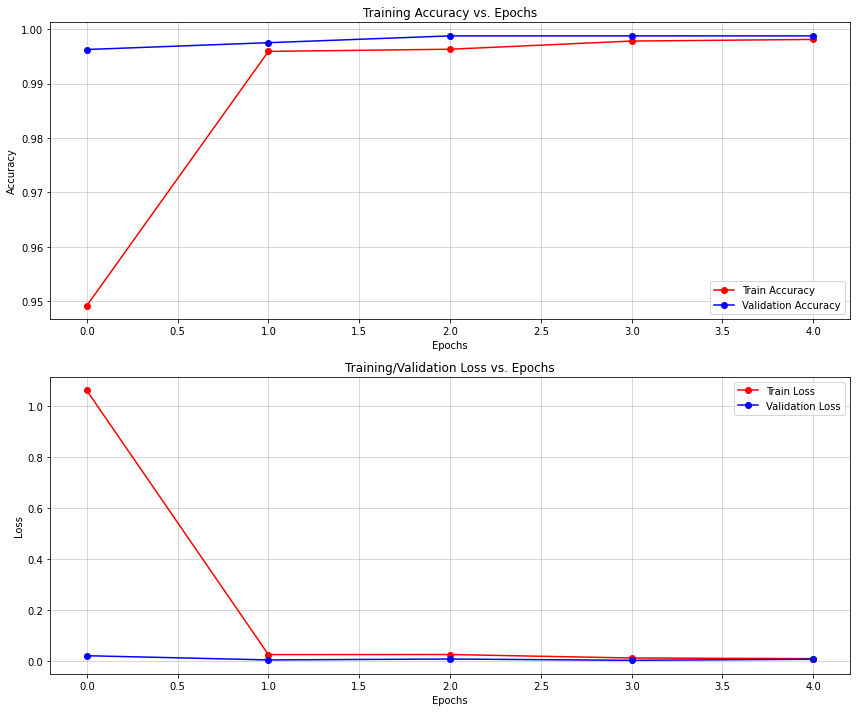

In [ ]:
#plots
#Plotting training and validation accuracy, loss
h = inception_history.history
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(h['accuracy'], 'o-', label='Train Accuracy', color='red')
ax[0].plot(h['val_accuracy'], 'o-', label='Validation Accuracy', color='blue')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')
ax[0].grid(linewidth='0.5')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(h['loss'], 'o-', label='Train Loss', color='red')
ax[1].plot(h['val_loss'], 'o-', label='Validation Loss', color='blue')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')
ax[1].grid(linewidth='0.5')

plt.tight_layout()
plt.show()

####Evaluation####

In [ ]:
#evaluates performance
inception = model.evaluate(test_set1, verbose=0)
print("    Loss: {:.5f}".format(inception[0]))
print("Accuracy: {:.3f}%".format(inception[1] * 100))

    Loss: 0.00558
Accuracy: 99.899%


In [ ]:
#makes prediction on the test set using the trained model
test_pred = model.predict(test_set1)
test_pred = np.argmax(test_pred,axis = 1)
test_labels = test_set1.labels

16/16 [==============================] - 49s 171ms/step


Text(0.5, 1.0, 'Confusion Matrix - Test Set')

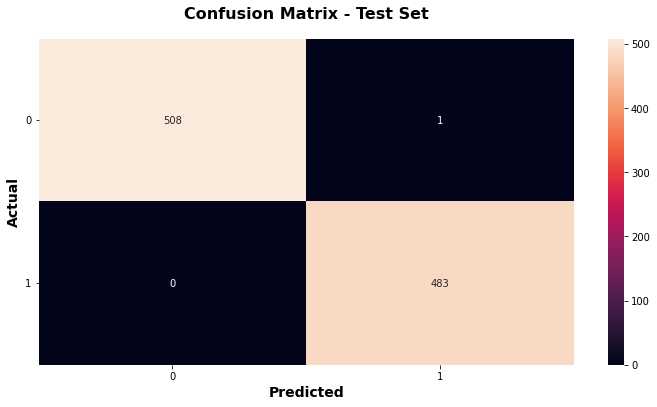

In [ ]:
#creates a confusion matrix for the test set predictions
plt.figure(figsize=(12, 6))
ax = sns.heatmap(tf.math.confusion_matrix(
    test_labels,
    test_pred,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None,
),annot = True,
  fmt="d")
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20)

In [ ]:
#print a classification report for the test set predictions
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(test_labels,test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       509
           1       1.00      1.00      1.00       483

    accuracy                           1.00       992
   macro avg       1.00      1.00      1.00       992
weighted avg       1.00      1.00      1.00       992



###Model2###

In [ ]:
train_set2.class_indices

{'WithoutMask': 0, 'WithMask': 1}

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.models import Sequential

#build and compile model
inception = InceptionV3(include_top=False, 
                  weights='imagenet', 
                  input_shape=(224,224,3))    #VCG16 only accepts 224 image size

for layer in inception.layers:
    layer.trainable = False

model = Sequential()  #new keras model object
model.add(inception)  #add new layer
model.add(Flatten())  #convertsoutput to 1D vector
model.add(Dense(2,activation='softmax'))  #produce vector of length 2
model.summary()

model.compile(optimizer='adam',   #Adaptive Moment Estimation
              loss='binary_crossentropy',    #measures difference between predicted class and true class probabilities
              metrics = ['accuracy'])   #measures proportion of correctly classified images

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_9 (Flatten)         (None, 51200)             0         
                                                                 
 dense_9 (Dense)             (None, 2)                 102402    
                                                                 
Total params: 21,905,186
Trainable params: 102,402
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
#training
inception_history = model.fit(train_set2,epochs=5,validation_data=val_set)

Epoch 1/5
313/313 [==============================] - 126s 389ms/step - loss: 0.2046 - accuracy: 0.9757 - val_loss: 0.0125 - val_accuracy: 0.9975
Epoch 2/5
313/313 [==============================] - 121s 387ms/step - loss: 0.0302 - accuracy: 0.9964 - val_loss: 0.0017 - val_accuracy: 0.9987
Epoch 3/5
313/313 [==============================] - 122s 390ms/step - loss: 0.0182 - accuracy: 0.9974 - val_loss: 3.5675e-04 - val_accuracy: 1.0000
Epoch 4/5
313/313 [==============================] - 121s 385ms/step - loss: 0.0156 - accuracy: 0.9977 - val_loss: 0.0053 - val_accuracy: 0.9987
Epoch 5/5
313/313 [==============================] - 122s 391ms/step - loss: 0.0262 - accuracy: 0.9976 - val_loss: 0.0170 - val_accuracy: 0.9975


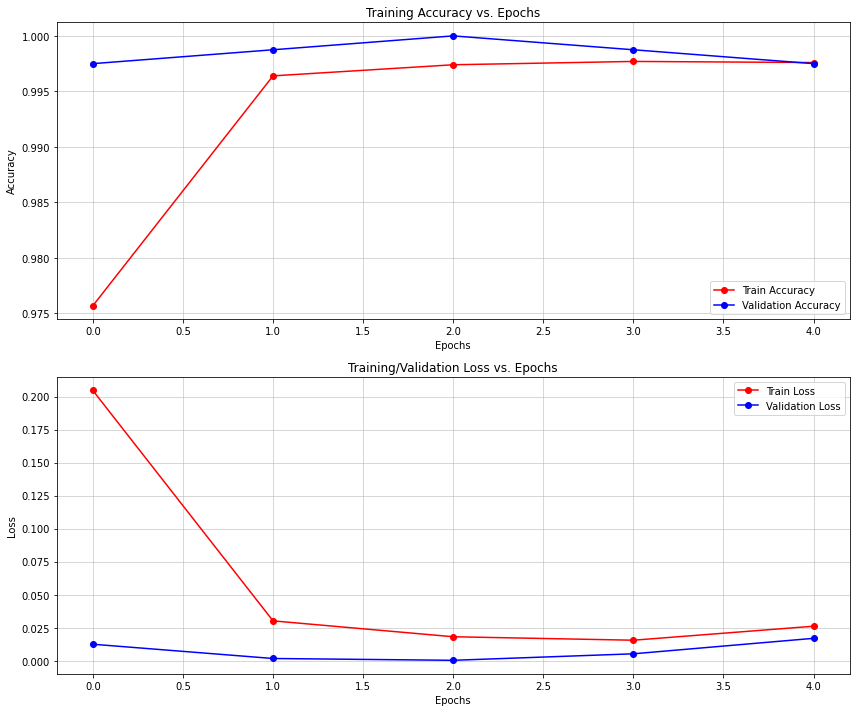

In [ ]:
#plots
#Plotting training and validation accuracy, loss
h = inception_history.history
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(h['accuracy'], 'o-', label='Train Accuracy', color='red')
ax[0].plot(h['val_accuracy'], 'o-', label='Validation Accuracy', color='blue')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')
ax[0].grid(linewidth='0.5')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(h['loss'], 'o-', label='Train Loss', color='red')
ax[1].plot(h['val_loss'], 'o-', label='Validation Loss', color='blue')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')
ax[1].grid(linewidth='0.5')

plt.tight_layout()
plt.show()

Evaluation

In [ ]:
#evaluates performance
inception = model.evaluate(test_set, verbose=0)
print("    Loss: {:.5f}".format(inception[0]))
print("Accuracy: {:.3f}%".format(inception[1] * 100))

    Loss: 0.06693
Accuracy: 99.496%


In [ ]:
#makes prediction on the test set using the trained model
test_pred = model.predict(test_set)
test_pred = np.argmax(test_pred,axis = 1)
test_labels = test_set.labels

31/31 [==============================] - 4s 82ms/step


Text(0.5, 1.0, 'Confusion Matrix - Test Set')

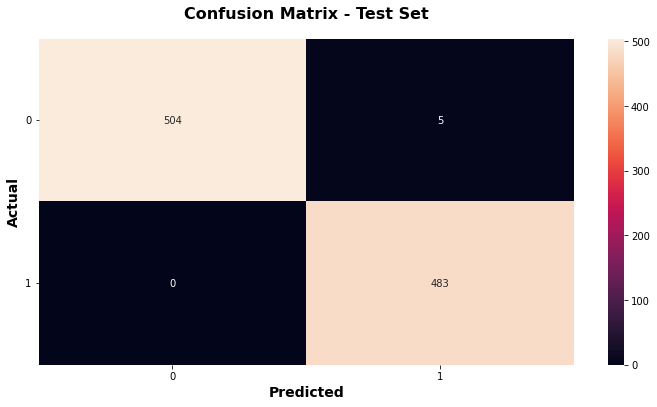

In [ ]:
#creates a confusion matrix for the test set predictions
plt.figure(figsize=(12, 6))
ax = sns.heatmap(tf.math.confusion_matrix(
    test_labels,
    test_pred,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None,
),annot = True,
  fmt="d")
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20)

##ResNet50##

###Model1###

In [ ]:
from tensorflow.keras.applications.resnet import ResNet50 

#build and compile model
resnet = ResNet50(include_top=False, 
                  weights='imagenet', 
                  input_shape=(224,224,3))    #VCG16 only accepts 224 image size

for layer in resnet.layers:
    layer.trainable = False

model = Sequential()  #new keras model object
model.add(resnet)   #add new layer
model.add(Flatten())    #converts output to 1D vector
model.add(Dense(2,activation='softmax'))
model.summary()   #produce vector of length 2

model.compile(optimizer='adam',   #Adaptive Moment Estimation
              loss='categorical_crossentropy',    #measures difference between predicted class and true class probabilities
              metrics = ['accuracy'])   #measures proportion of correctly classified images

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_6 (Flatten)         (None, 100352)            0         
                                                                 
 dense_6 (Dense)             (None, 2)                 200706    
                                                                 
Total params: 23,788,418
Trainable params: 200,706
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
#training
resnet_history = model.fit(train_set1,epochs=5,validation_data=val_set1)

Epoch 1/5
157/157 [==============================] - 136s 847ms/step - loss: 2.6726 - accuracy: 0.5817 - val_loss: 4.0734 - val_accuracy: 0.4869
Epoch 2/5
157/157 [==============================] - 133s 845ms/step - loss: 3.3615 - accuracy: 0.6245 - val_loss: 0.5769 - val_accuracy: 0.7903
Epoch 3/5
157/157 [==============================] - 137s 872ms/step - loss: 1.5949 - accuracy: 0.6587 - val_loss: 2.0967 - val_accuracy: 0.6290
Epoch 4/5
157/157 [==============================] - 133s 849ms/step - loss: 2.0305 - accuracy: 0.6974 - val_loss: 1.3849 - val_accuracy: 0.5444
Epoch 5/5
157/157 [==============================] - 135s 858ms/step - loss: 1.4078 - accuracy: 0.7605 - val_loss: 0.6557 - val_accuracy: 0.7913


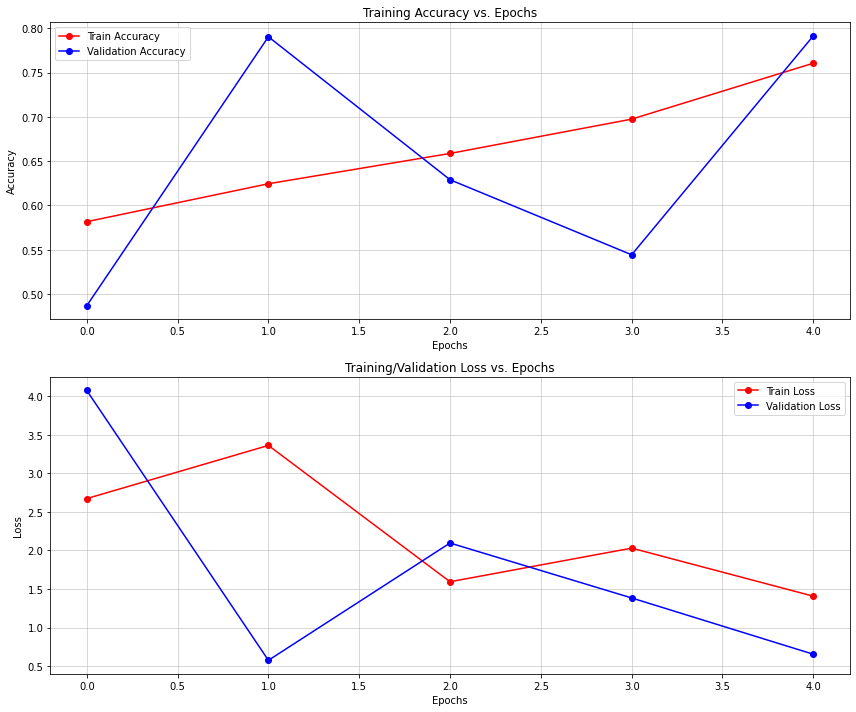

In [ ]:
#plots
#Plotting training and validation accuracy, loss
h = resnet_history.history
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(h['accuracy'], 'o-', label='Train Accuracy', color='red')
ax[0].plot(h['val_accuracy'], 'o-', label='Validation Accuracy', color='blue')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')
ax[0].grid(linewidth='0.5')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(h['loss'], 'o-', label='Train Loss', color='red')
ax[1].plot(h['val_loss'], 'o-', label='Validation Loss', color='blue')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')
ax[1].grid(linewidth='0.5')

plt.tight_layout()
plt.show()

####Evaluation####

In [ ]:
#evaluates performance
resnet = model.evaluate(test_set1, verbose=0)
print("    Loss: {:.5f}".format(resnet[0]))
print("Accuracy: {:.3f}%".format(resnet[1] * 100))

    Loss: 0.65574
Accuracy: 79.133%


In [ ]:
#makes prediction on the test set using the trained model
test_pred = model.predict(test_set1)
test_pred = np.argmax(test_pred,axis = 1)
test_labels = test_set.labels

16/16 [==============================] - 3s 212ms/step


Text(0.5, 1.0, 'Confusion Matrix - Test Set')

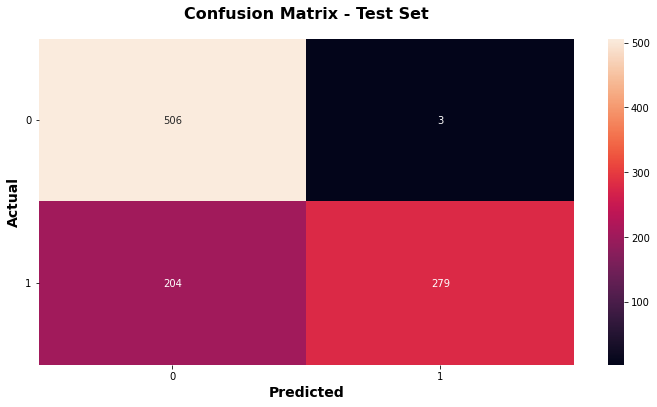

In [ ]:
#creates a confusion matrix for the test set predictions
plt.figure(figsize=(12, 6))
ax = sns.heatmap(tf.math.confusion_matrix(
    test_labels,
    test_pred,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None,
),annot = True,
  fmt="d")
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20)

In [ ]:
#print a classification report for the test set predictions
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(test_labels,test_pred))

              precision    recall  f1-score   support

           0       0.71      0.99      0.83       509
           1       0.99      0.58      0.73       483

    accuracy                           0.79       992
   macro avg       0.85      0.79      0.78       992
weighted avg       0.85      0.79      0.78       992



###Model2###

In [ ]:
from tensorflow.keras.applications.resnet import ResNet50 

#build and compile model
resnet = ResNet50(include_top=False, 
                  weights='imagenet', 
                  input_shape=(224,224,3))    #VCG16 only accepts 224 image size

for layer in resnet.layers:
    layer.trainable = False

model = Sequential()  #new keras model object
model.add(resnet)   #add new layer
model.add(Flatten())    #converts output to 1D vector
model.add(Dense(2,activation='softmax'))
model.summary()   #produce vector of length 2

model.compile(optimizer='adam',   #Adaptive Moment Estimation
              loss='categorical_crossentropy',    #measures difference between predicted class and true class probabilities
              metrics = ['accuracy'])   #measures proportion of correctly classified images

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_11 (Flatten)        (None, 100352)            0         
                                                                 
 dense_11 (Dense)            (None, 2)                 200706    
                                                                 
Total params: 23,788,418
Trainable params: 200,706
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
#training
resnet_history = model.fit(train_set2,epochs=5,validation_data=val_set)

Epoch 1/5
313/313 [==============================] - 124s 396ms/step - loss: 2.0449 - accuracy: 0.7474 - val_loss: 0.2423 - val_accuracy: 0.8850
Epoch 2/5
313/313 [==============================] - 122s 390ms/step - loss: 0.8978 - accuracy: 0.7903 - val_loss: 0.8855 - val_accuracy: 0.6925
Epoch 3/5
313/313 [==============================] - 124s 395ms/step - loss: 0.4674 - accuracy: 0.8555 - val_loss: 0.1613 - val_accuracy: 0.9475
Epoch 4/5
313/313 [==============================] - 122s 389ms/step - loss: 0.7506 - accuracy: 0.8567 - val_loss: 0.8234 - val_accuracy: 0.7275
Epoch 5/5
313/313 [==============================] - 125s 398ms/step - loss: 1.5561 - accuracy: 0.7738 - val_loss: 0.3683 - val_accuracy: 0.8725


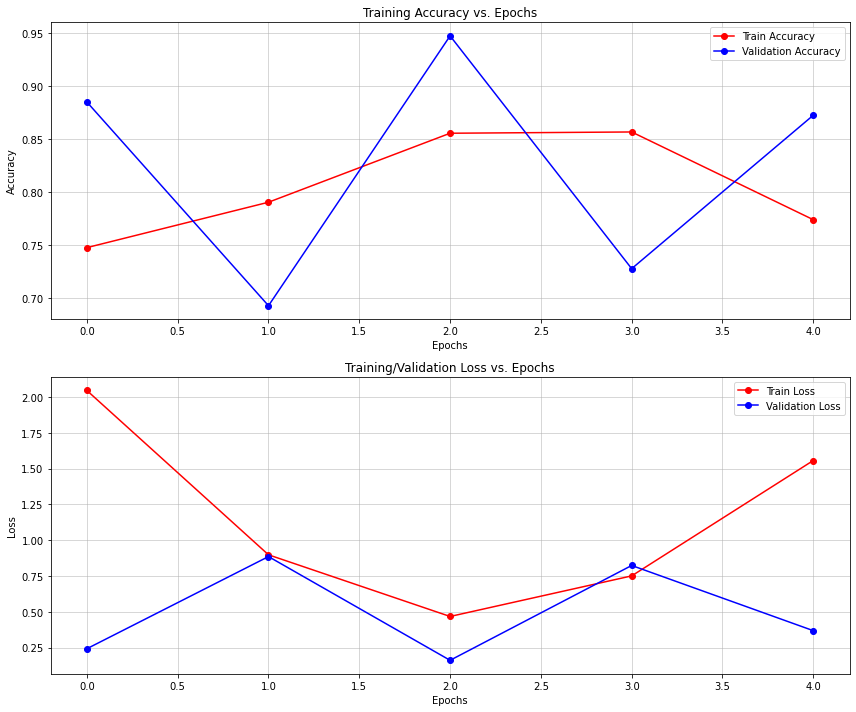

In [ ]:
#plots
#Plotting training and validation accuracy, loss
h = resnet_history.history
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(h['accuracy'], 'o-', label='Train Accuracy', color='red')
ax[0].plot(h['val_accuracy'], 'o-', label='Validation Accuracy', color='blue')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')
ax[0].grid(linewidth='0.5')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(h['loss'], 'o-', label='Train Loss', color='red')
ax[1].plot(h['val_loss'], 'o-', label='Validation Loss', color='blue')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')
ax[1].grid(linewidth='0.5')

plt.tight_layout()
plt.show()

####Evaluation####

In [ ]:
#evaluates performance
resnet = model.evaluate(test_set, verbose=0)
print("    Loss: {:.5f}".format(resnet[0]))
print("Accuracy: {:.3f}%".format(resnet[1] * 100))

    Loss: 0.38648
Accuracy: 87.601%


In [ ]:
#makes prediction on the test set using the trained model
test_pred = model.predict(test_set)
test_pred = np.argmax(test_pred,axis = 1)
test_labels = test_set.labels

31/31 [==============================] - 4s 123ms/step


Text(0.5, 1.0, 'Confusion Matrix - Test Set')

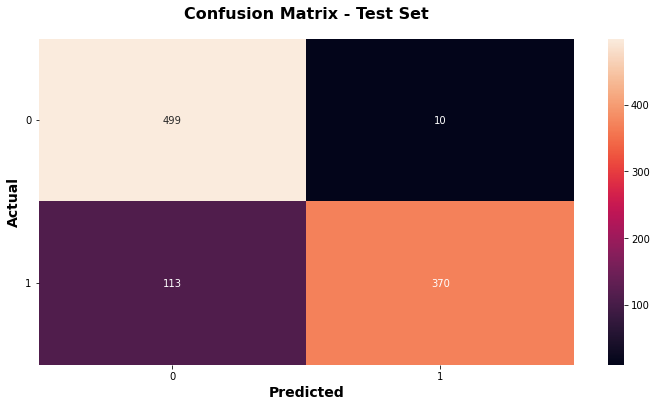

In [ ]:
#creates a confusion matrix for the test set predictions
plt.figure(figsize=(12, 6))
ax = sns.heatmap(tf.math.confusion_matrix(
    test_labels,
    test_pred,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None,
),annot = True,
  fmt="d")
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20)

In [ ]:
#print a classification report for the test set predictions
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(test_labels,test_pred))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89       509
           1       0.97      0.77      0.86       483

    accuracy                           0.88       992
   macro avg       0.89      0.87      0.87       992
weighted avg       0.89      0.88      0.87       992



##CNN##

In [ ]:
# Let's plot a few images
train_path = "/content/Face Mask Dataset/Train"
validation_path = "/content/Face Mask Dataset/Validation"
test_path = "/content/Face Mask Dataset/Test"

image_categories = os.listdir("/content/Face Mask Dataset/Train")

In [ ]:
# Creating Image Data Generator for train, validation and test set

# 1. Train Set
train_gen = ImageDataGenerator(rescale = 1.0/255.0,validation_split=0.2) # Normalise the data
train_image_generator = train_gen.flow_from_directory(
                                            train_path,
                                            target_size=(32, 32),
                                            batch_size=32,
                                            class_mode='binary')

# 2. Validation Set
val_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
val_image_generator = train_gen.flow_from_directory(
                                            validation_path,
                                            target_size=(32, 32),
                                            batch_size=32,
                                            class_mode='binary')

# 3. Test Set
test_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
test_image_generator = train_gen.flow_from_directory(
                                            test_path,
                                            target_size=(32, 32),
                                            batch_size=32,
                                            class_mode='binary')

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


Build Model


In [ ]:
inputs = tf.keras.Input(shape=(32, 32, 3))
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D()(x)

x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D()(x)

x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_846 (Conv2D)         (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_847 (Conv2D)         (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 global_average_pooling2d (G  (None, 64)               0     

In [ ]:
# Compile and train the model
early_stopping = keras.callbacks.EarlyStopping(patience=5) # Set up callbacks
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics='accuracy')
hist = model.fit(train_image_generator, 
                 epochs=10, 
                 verbose=1, 
                 validation_data=val_image_generator, 
                 callbacks=early_stopping)

Epoch 1/10
313/313 [==============================] - 16s 46ms/step - loss: 0.1130 - accuracy: 0.9593 - val_loss: 0.1016 - val_accuracy: 0.9638
Epoch 2/10
313/313 [==============================] - 14s 46ms/step - loss: 0.1075 - accuracy: 0.9627 - val_loss: 0.1201 - val_accuracy: 0.9600
Epoch 3/10
313/313 [==============================] - 14s 46ms/step - loss: 0.0973 - accuracy: 0.9664 - val_loss: 0.0922 - val_accuracy: 0.9663
Epoch 4/10
313/313 [==============================] - 14s 46ms/step - loss: 0.0941 - accuracy: 0.9669 - val_loss: 0.0848 - val_accuracy: 0.9675
Epoch 5/10
313/313 [==============================] - 14s 45ms/step - loss: 0.0880 - accuracy: 0.9690 - val_loss: 0.1025 - val_accuracy: 0.9725
Epoch 6/10
313/313 [==============================] - 16s 51ms/step - loss: 0.0842 - accuracy: 0.9692 - val_loss: 0.0858 - val_accuracy: 0.9700
Epoch 7/10
313/313 [==============================] - 14s 46ms/step - loss: 0.0795 - accuracy: 0.9719 - val_loss: 0.0957 - val_accuracy:

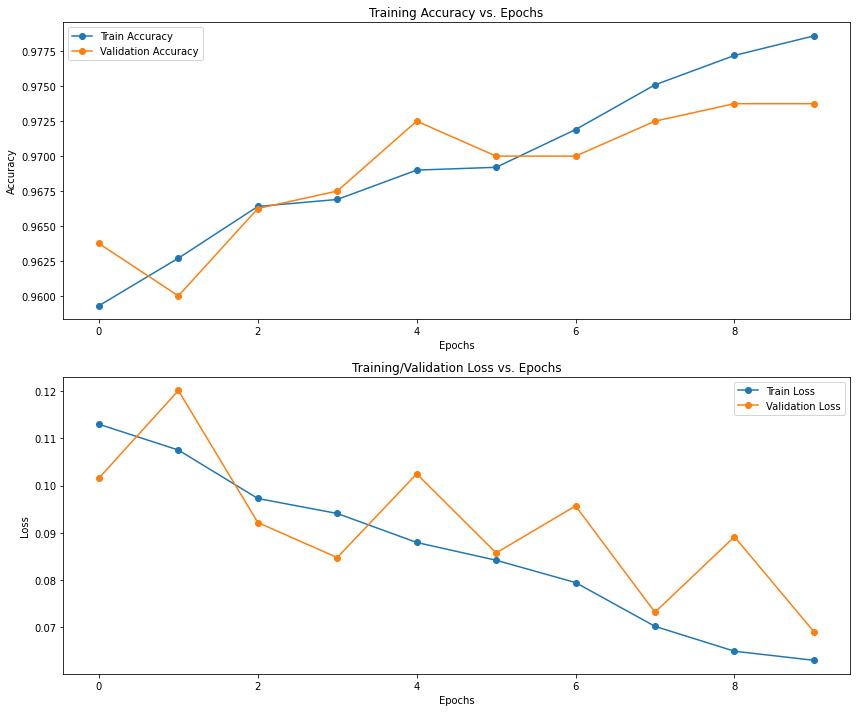

In [ ]:
#Plotting training and validation accuracy, loss
h = hist.history
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(h['accuracy'], 'o-', label='Train Accuracy')
ax[0].plot(h['val_accuracy'], 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(h['loss'], 'o-', label='Train Loss')
ax[1].plot(h['val_loss'], 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

plt.tight_layout()
plt.show()

In [ ]:
# Predict the accuracy for the test set
results = model.evaluate(test_image_generator, verbose=0)
print("    Loss: {:.5f}".format(results[0]))
print("Accuracy: {:.3f}%".format(results[1] * 100))

    Loss: 0.08506
Accuracy: 96.875%


In [ ]:
test_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
test_image_generator = train_gen.flow_from_directory(
                                            test_path,
                                            target_size=(32, 32),
                                            batch_size=32,
                                            class_mode='binary')

Found 992 images belonging to 2 classes.


1/1 [==============================] - 0s 70ms/step


<ipython-input-108-81c836fe7ac4>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  predictions = np.squeeze(model.predict(samples[0]) >= 0.5).astype(np.int)
<ipython-input-108-81c836fe7ac4>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional inf

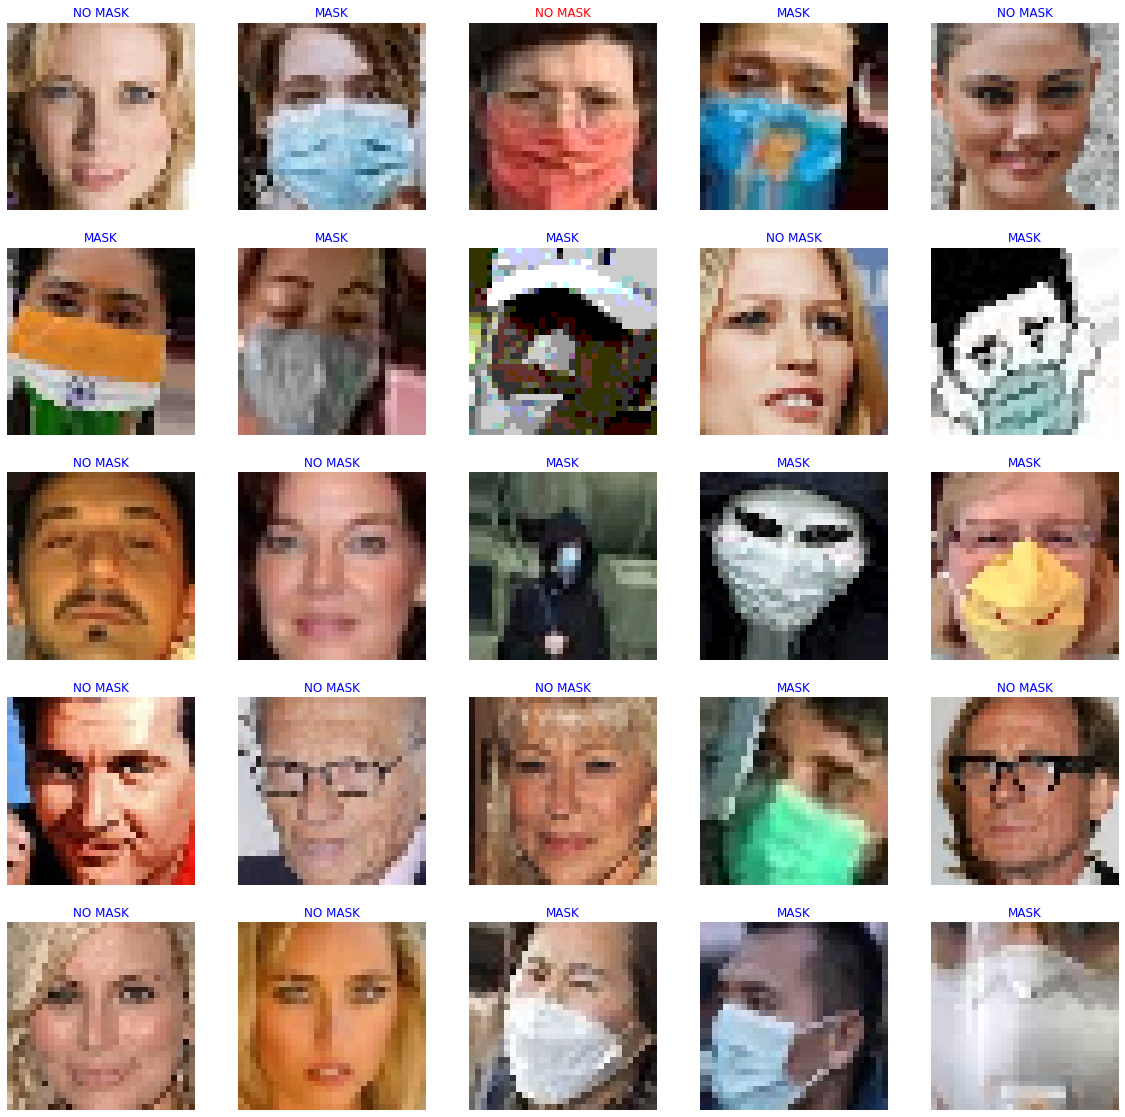

In [ ]:
#prediction
samples = test_image_generator.next()

predictions = np.squeeze(model.predict(samples[0]) >= 0.5).astype(np.int)
labels = samples[1].astype(np.int)

plt.figure(figsize=(20, 20))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(samples[0][i])
    plt.axis('off')
    plt.title(("NO MASK" if predictions[i] == 1 else "MASK"), color=('blue' if labels[i] == predictions[i] else 'red'))

plt.show()

##Comparing All 3 Models##

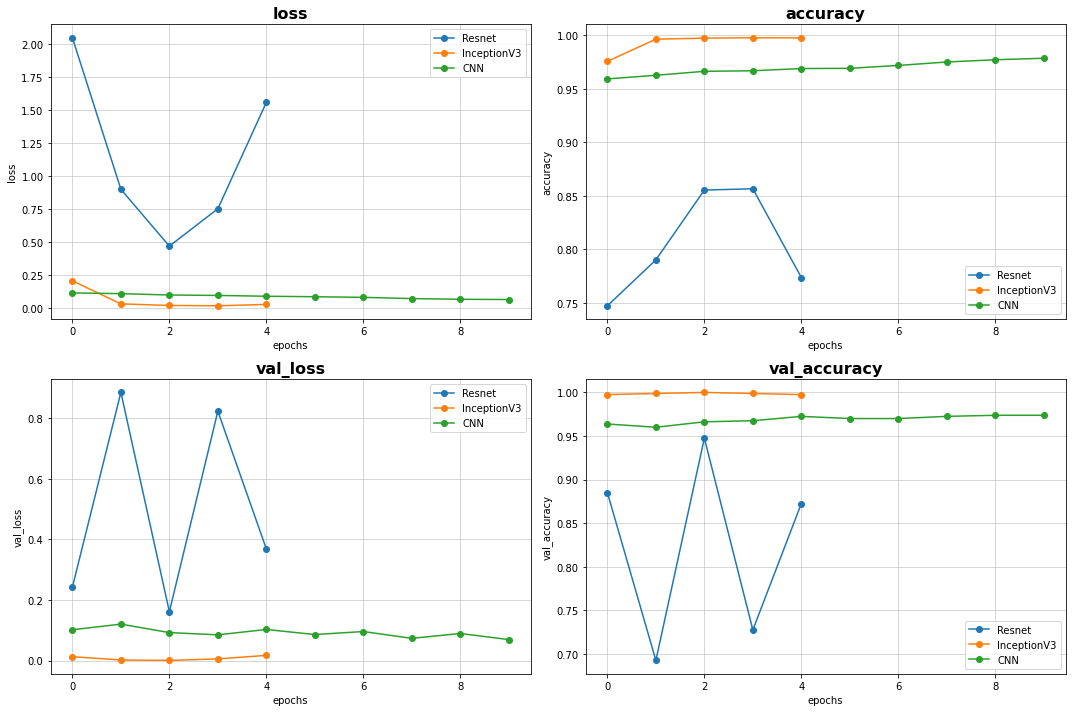

In [ ]:
model_hist = [resnet_history,inception_history,hist]
names = ['Resnet','InceptionV3', 'CNN']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.subplots_adjust(hspace=0.3)
for metric in model_hist[0].history:
    index = list(model_hist[0].history).index(metric)
    ax = axes.flatten()[index]
    name_index = 0
    for history in model_hist:
        ax.plot(history.history[metric], 'o-',label=names[name_index])
        name_index += 1
    ax.set_title(metric, size=15, weight='bold', fontsize=16)
    ax.grid(linewidth='0.5')
    ax.set_xlabel('epochs')
    ax.set_ylabel(metric)
    ax.legend()
plt.tight_layout()
plt.show()

In [ ]:
data={'Nets':['Resnet','InceptionV3','CNN'],
      'Accuracy':[resnet[1],inception[1],results[1]]}

df =pd.DataFrame(data)

df.sort_values('Accuracy', ascending=False)

,Nets,Accuracy
1,InceptionV3,0.994960
2,CNN,0.968750
0,Resnet,0.876008
